# Using a Bootstrap Method to Choose the Sample Fraction in Tail Index Estimation
### Generation of data

#### Distribution
On peut utiliser des données i.i.d. :
- [x] Student-t
- [x] type 2 (=Frechet) extreme value distribution
- [ ] generalized extreme value distribution (pas dans l'article)

On peut utiliser des données dépendantes :
- [ ] MA(1) process avec des variables cachées de Student-t
- [ ] Stochastic processes

On peut utiliser des données réelles
- [ ] Données financières

#### Nombre d'échantillons
2_000 à 20_000 échantillons


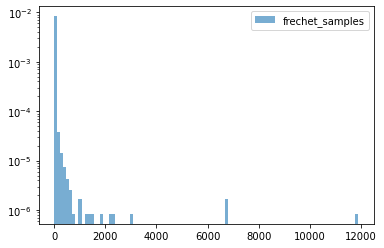

In [192]:
import numpy as np
from scipy.stats import t, invweibull, genextreme
import matplotlib.pyplot as plt


### Simulation variables de Student

# df = 10
# r = t.rvs(df, size=10000)
# plt.hist(r, density=True, bins=100, log=False)

# fig, ax = plt.subplots(1, 1)
# mean, var, skew, kurt = t.stats(df, moments='mvsk')
# x = np.linspace(t.ppf(0.01, df),
#                 t.ppf(0.99, df), 100)
# ax.plot(x, t.pdf(x, df),
#        'r-', lw=5, alpha=0.6, label='t pdf')

# rv = t(df)
# ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# vals = t.ppf([0.001, 0.5, 0.999], df)
# np.allclose([0.001, 0.5, 0.999], t.cdf(vals, df))

# ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
# ax.legend(loc='best', frameon=False)
# plt.show()

def get_student_sample(degrees_freedom, size_sample, get_plot=False, log_plot=False, nb_bins=100):
    # Le nombre de degrés de liberté correspond au nombre de paramètres
    # Si degrees_freedom < 1 : pas d'espérance
    r = t.rvs(degrees_freedom, size=size_sample)
    if get_plot:
        plt.hist(r, density=True, bins=nb_bins, log=log_plot, label="student_samples", alpha = 0.8)
        plt.legend()
    return r


### Simulation type II EVD (Frechet distribution)


def get_frechet_sample(inv_gamma, size_sample, get_plot=False, log_plot=False, nb_bins=100):
    r = invweibull.rvs(inv_gamma, size=size_sample)
    if get_plot:
        plt.hist(r, density=True, bins=nb_bins, log=log_plot, label="frechet_samples", alpha = 0.6)
        plt.legend()
    return r


# # Trouver la relation entre X suit frechet et Y suit GEV
# def get_frechet_sample_with_genextreme(inv_gamma, size_sample, get_plot=False, log_plot=False, nb_bins=100):
#     # inv_gamma correspond au shape param
#     # Si inv_gamma < 1 pas d'esp
#     c = -1/inv_gamma
#     sigma = 1
#     mu = 0
#     r = genextreme.rvs(c, size=size_sample)
# #     r = (1+1/c*r)**(-c)  # TODO : Trouver la relation entre X suit frechet et Y suit GEV
#     if get_plot:
#         plt.hist(r, density=True, bins=nb_bins, log=log_plot, label="frechet_samples_extreme", alpha = 0.6)
#         plt.legend()
#     return r
    

inv_gamma = 1
size_sample = 10000
nb_bins = 100
r1 = get_frechet_sample(inv_gamma, size_sample, get_plot=True, log_plot=True,nb_bins=nb_bins)
# r2 = get_frechet_sample_with_genextreme(inv_gamma, size_sample, get_plot=True, log_plot=True,nb_bins=nb_bins)
# print(r1.mean(),r2.mean())

### Estimation of optimal tail index with de_hann_1998

#### On définit les estimateurs de gamma
- [x] estimateur ordre 1
- [x] estimateur ordre 2

#### On définit l'estimateur erreur quadratique asymptotique
- [ ] estimateur asymptotique avec du bootstrap

In [209]:
### On définit les estimateurs de gamma de de Haan 1998

from random import choices


def gamma_moment_1_estimator(k, sample):
    sorted_sample = np.sort(sample)
    k_largest_samples = sorted_sample[-k:]
    kest_largest = sorted_sample[-k]
    moment_1_estimator = np.mean(np.log(k_largest_samples)-np.log(kest_largest))
    return moment_1_estimator

# # Test du moment ordre 1
# inv_gamma = 5
# size_sample = 10000
# r1 = get_frechet_sample(inv_gamma, size_sample)
# gamma_moment_1_estimator(1000,r1)

def gamma_moment_2_estimator(k, sample):
    sorted_sample = np.sort(sample)
    k_largest_samples = sorted_sample[-k:]
    kest_largest = sorted_sample[-k]
    moment_2_estimator = np.mean((np.log(k_largest_samples)-np.log(kest_largest))**2)
    return moment_2_estimator/(2*gamma_moment_1_estimator(k, sample))

# # Test du moment ordre 2
# inv_gamma = 3
# size_sample = 10000
# r1 = get_frechet_sample(inv_gamma, size_sample)
# gamma_moment_2_estimator(1000,r1)


def Q_bootstrapped_quadratic_asymp_error_estimator(k1, n1_bootstrap, sample, monte_carlo_steps=2000):
    # On calcule Q par Monte-Carlo
    q_values_list = list()
    for i in range(monte_carlo_steps):
        bootstrapped_sample = choices(sample, k=n1_bootstrap)
        gamma_moment_1 = gamma_moment_1_estimator(k1, bootstrapped_sample)
        gamma_moment_2 = gamma_moment_2_estimator(k1, bootstrapped_sample)
        q_value = (gamma_moment_2*(2*gamma_moment_1) - 2*gamma_moment_1**2)**2
        q_values_list.append(q_value)
    return np.mean(q_values_list)


def find_argmin_Q()

In [214]:
r = np.random.randn(3)

In [231]:
choices(r, k=10)

[0.6232925773287759,
 0.6232925773287759,
 1.5199650101571107,
 -0.5852033687963764,
 -0.5852033687963764,
 1.5199650101571107,
 -0.5852033687963764,
 1.5199650101571107,
 -0.5852033687963764,
 1.5199650101571107]